In [1]:
import openslide
import cv2
import numpy as np
from slide import Slide
from PIL import Image

In [2]:
base_path = "/Users/jeremyscheurer/Code/data/MF_Eczema"
fname = "E1.mrxs"
slide = Slide(base_path + "/" + fname)
boxes = slide.compute_boxes(intensity_threshold=245)

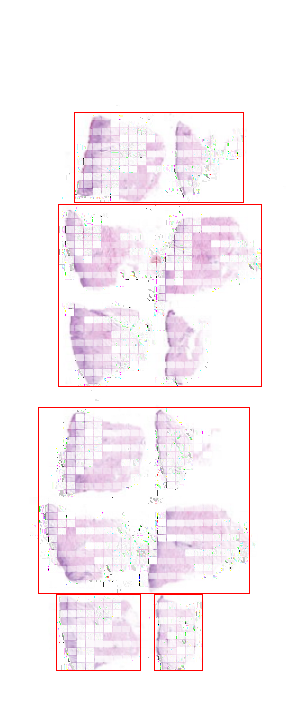

In [3]:
slide.get_thumbnail_with_boxes()

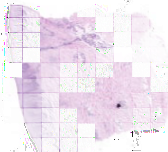

In [4]:
level = 7
region = slide.get_region(slide.boxes[level][-2], level)
region

## Lets import an annotation segmentation file of type .png

In [5]:
Image.MAX_IMAGE_PIXELS = 100000000000

path_to_segmentation_file = "/Users/jeremyscheurer/Code/data/MF_Eczema/E1_annekatrin.zimmermann_label.png"
annotation = Image.open(path_to_segmentation_file)
print("width and height", annotation.size)

width and height (77080, 185659)


In [6]:
segmentation_slide_box = slide.boxes[0][-2]
cropped_annotation = annotation.crop(segmentation_slide_box)

In [7]:
cropped_annotation.thumbnail((500,500))
cropped_annotation.show()

annotation.thumbnail((500,500))
annotation.show()